# 북한에 대한 세계정세 예측

## 미국 시사 잡지 타임 뉴스 가져오기

In [56]:
from urllib.parse import quote_plus

import requests
import lxml.html

In [57]:
query = 'north+korea'

In [67]:
url = 'http://search.time.com/?site=time&q={query}&startIndex={page}&sort=Date'

In [105]:
articles = []
for page in range(1, 101,10):
    search_url = url.format(query=query, page=page)
    res = requests.get(search_url)
    root = lxml.html.fromstring(res.text)
    for link in root.cssselect('div.content-title > a'):  # 링크 추출
        news = requests.get(link.attrib['href'])
        news_root = lxml.html.fromstring(news.text)
        article = news_root.cssselect('article.row')[0]  # 본문 추출
        text = article.text_content()
        articles.append(text)

IndexError: list index out of range

## 문제점 및 해결

IndexError는 본문 추출을 할 때 list 등에서 잘못된 인덱스로 접근하는 경우에 발생한다.

-> 이 경우 CSS 선택자를 바르게 지정 했지만 위와 같이 오류가 발생하였기 때문에 이것을 예외처리 해주어 해결하였다.

In [106]:
try:  # 일단 시도를 해본다
    article = news_root.cssselect('article.row')[0]  # 본문 추출
    text = article.text_content()
    articles.append(text)
except IndexError:  # IndexError가 발생할 경우
    pass  # 아무 일도 하지 않고 넘어간다

In [107]:
len(articles)

18

In [72]:
articles[0]

'(WASHINGTON) — U.S. President Donald  Trump  will urge President Xi Jinping to make good on his commitments to  press ure  North  Korea  when he  visit s  China  next month, a senior White House official said on Monday, stepping up a strategy to have  Beijing  help rein in Pyongyang.Isolating  North  Korea  further over its nuclear and ballistic missile tests is a key goal for  Trump  on what will be his longest foreign trip to date.Trump  will call on Xi to fully implement U.N. Security Council resolutions against Pyongyang and take other steps to  press ure  North  Korea .China ,  North  Korea ’s sole major ally, accounts for more than 90% of  trade  with the isolated country.China  has said it will strictly enforce U.N. Security Council sanctions banning imports of coal, textiles and seafood, while cutting off oil shipments to the  North .RelatedForeign PolicyRex Tillerson Seeks Help From Arab Nations in the U.S. Effort to Isolate IranForeign PolicyRex Tillerson Seeks Help From Ara

## TDM

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv = CountVectorizer(max_features=1000, stop_words='english')

In [75]:
tdm = cv.fit_transform(articles)

In [76]:
words = cv.get_feature_names()

In [77]:
words[:30]

['000',
 '12',
 '30',
 '54',
 'abe',
 'able',
 'absolutely',
 'according',
 'action',
 'actions',
 'active',
 'adapt',
 'added',
 'adding',
 'administration',
 'advance',
 'advantage',
 'adviser',
 'afghanistan',
 'africa',
 'africom',
 'agency',
 'agenda',
 'ago',
 'allies',
 'ally',
 'ambassador',
 'america',
 'american',
 'americans']

In [78]:
count_mat = tdm.sum(axis=0)

In [79]:
count_mat

matrix([[  2,   3,   3,   4,  51,   3,   4,   5,   4,   2,   2,   3,   3,
           4,  12,   4,   4,   3,   5,   4,   3,   6,   3,   5,   3,   4,
           3,  11,  19,   7,   3,   4,   3,   7,   5,   3,   4,   3,   3,
           4,   4,   3,   4,   9,   6,   3,   3,   8,   3,   9,   5,   4,
           3,   3,   2,   3,   4,   7,   5,   3,   7,  13,  18,   4,   8,
           3,   5,   3,   5,   4,   6,  12,   8,   4,   5,   3,   3,   9,
           3,  18,   4,   6,   3,   5,   3,   3,   2,  41,   8,   3,   4,
           2,   2,   3,   3,   2,   2,  10,   2,   2,   4,   3,   3,   5,
           5,   8,   6,   4,   3,   6,   3,   3,   3,   3,   4,   3,   4,
           3,   8,   4,   8,   3,   4,   6,   9,   4,   4,   5,   4,  32,
           5,   3,   4,   3,   3,   2,   2,   6,   3,   2,   6,   5,   3,
           3,   3,   3,   4,   3,   3,   9,   3,  12,  21,   8,   4,   8,
           4,   2,   3,   2,   3,   5,   2,   8,   2,   2,   4,   2,   2,
           4,   4,   3,   7,   3,   3,

In [80]:
import numpy

In [81]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [82]:
count

array([  2,   3,   3,   4,  51,   3,   4,   5,   4,   2,   2,   3,   3,
         4,  12,   4,   4,   3,   5,   4,   3,   6,   3,   5,   3,   4,
         3,  11,  19,   7,   3,   4,   3,   7,   5,   3,   4,   3,   3,
         4,   4,   3,   4,   9,   6,   3,   3,   8,   3,   9,   5,   4,
         3,   3,   2,   3,   4,   7,   5,   3,   7,  13,  18,   4,   8,
         3,   5,   3,   5,   4,   6,  12,   8,   4,   5,   3,   3,   9,
         3,  18,   4,   6,   3,   5,   3,   3,   2,  41,   8,   3,   4,
         2,   2,   3,   3,   2,   2,  10,   2,   2,   4,   3,   3,   5,
         5,   8,   6,   4,   3,   6,   3,   3,   3,   3,   4,   3,   4,
         3,   8,   4,   8,   3,   4,   6,   9,   4,   4,   5,   4,  32,
         5,   3,   4,   3,   3,   2,   2,   6,   3,   2,   6,   5,   3,
         3,   3,   3,   4,   3,   3,   9,   3,  12,  21,   8,   4,   8,
         4,   2,   3,   2,   3,   5,   2,   8,   2,   2,   4,   2,   2,
         4,   4,   3,   7,   3,   3,   4,   3,   3,  13,   4,  1

In [83]:
word_count = list(zip(words, count))

In [84]:
word_count[:30]

[('000', 2),
 ('12', 3),
 ('30', 3),
 ('54', 4),
 ('abe', 51),
 ('able', 3),
 ('absolutely', 4),
 ('according', 5),
 ('action', 4),
 ('actions', 2),
 ('active', 2),
 ('adapt', 3),
 ('added', 3),
 ('adding', 4),
 ('administration', 12),
 ('advance', 4),
 ('advantage', 4),
 ('adviser', 3),
 ('afghanistan', 5),
 ('africa', 4),
 ('africom', 3),
 ('agency', 6),
 ('agenda', 3),
 ('ago', 5),
 ('allies', 3),
 ('ally', 4),
 ('ambassador', 3),
 ('america', 11),
 ('american', 19),
 ('americans', 7)]

In [85]:
import operator

In [86]:
word_count = sorted(             # 정렬
    word_count,
    key=operator.itemgetter(1),  # 1번째(빈도)를 기준으로
    reverse=True)                # 내림차순으로

In [87]:

word_count[:30]

[('north', 114),
 ('korea', 110),
 ('said', 75),
 ('trump', 66),
 ('abe', 51),
 ('president', 47),
 ('china', 41),
 ('nuclear', 38),
 ('japan', 33),
 ('country', 32),
 ('party', 32),
 ('security', 28),
 ('united', 26),
 ('know', 23),
 ('states', 23),
 ('kim', 22),
 ('korean', 22),
 ('leader', 22),
 ('south', 22),
 ('told', 22),
 ('democratic', 21),
 ('new', 21),
 ('help', 20),
 ('make', 20),
 ('american', 19),
 ('people', 19),
 ('pyongyang', 19),
 ('world', 19),
 ('called', 18),
 ('chad', 18)]

## WordCloud

In [93]:
%matplotlib inline

In [94]:
from matplotlib import pyplot

In [95]:
from wordcloud import WordCloud

In [98]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\YDWM05.ttf', background_color='white', width=400, height=300)

In [100]:
cloud = wc.fit_words(dict(word_count))

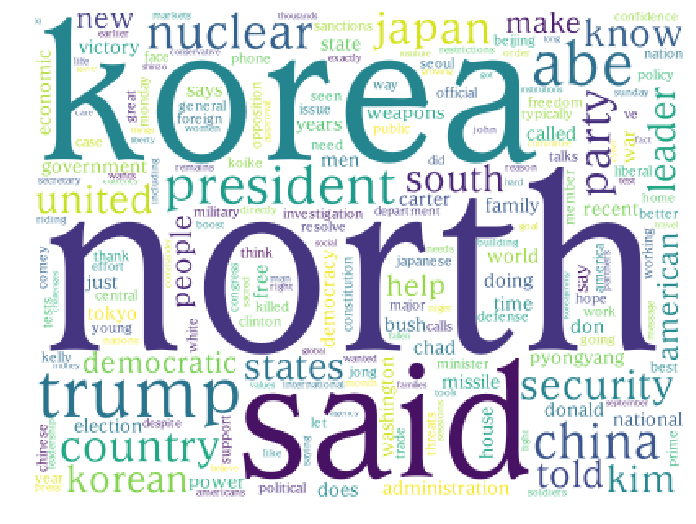

In [101]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()